In [1]:
from matplotlib import pyplot as pylt
import pandas as pd
import numpy as np
from collections import defaultdict
from scipy import stats

In [2]:
df = pd.read_csv('C:/Users/simon/Desktop/Ergebnisse/mesh.csv')

In [3]:
df.head()

,dir,ecLF,ccLF,icLF,icMF,ccMF,ecMF,pLF,pMF,aLF,...,pMT.aMiv,cLT.aSD,cLT.aMav,cLT.aMiv,eLT.aSD,eLT.aMav,eLT.aMiv,iMT.aSD,iMT.aMav,iMT.aMiv
0,9162498,1.512342,2.331075,1.488530,1.905267,2.757877,2.089731,2.577146,3.147659,2.154454,...,1.601168,0.488786,2.806636,1.199398,0.401328,2.104061,0.803592,0.617494,2.293031,0.411395
1,9211751,1.351034,2.331421,1.805596,1.939571,2.771100,1.968512,3.164766,2.739661,2.333359,...,1.351170,0.503985,2.601577,0.831598,0.425046,1.800617,0.398860,0.491363,2.264265,0.679028
2,9230284,1.370241,2.259759,1.284374,1.374738,1.885604,1.626626,2.714304,3.857170,2.648007,...,0.584741,0.323171,2.347304,1.261013,0.541212,1.937093,0.340253,0.641571,2.859315,0.890167
3,9156526,1.221672,1.940543,1.463180,1.954018,2.187528,1.286630,1.695914,2.634690,1.747326,...,0.975027,0.279738,1.382467,0.761748,0.338252,1.417087,0.355575,0.625862,2.421775,0.431305
4,9246518,1.362461,2.265803,1.760549,1.830328,2.261040,1.920952,2.533593,3.364189,2.608639,...,0.794609,0.742381,2.737869,0.359399,0.401153,1.681459,0.567228,1.226386,3.285507,0.666290


Fill NaN values with overall dataset mean.

In [4]:
#print(f'Filling {df[df.isna().any(axis=1)].shape[0]} instances containing NaN values.')

In [5]:
#d = defaultdict()
#for column in df.columns:
#    d[column] = df[column].mean()

In [6]:
#df.fillna(value=d, inplace=True)

Filter out extreme outliers (deviating more than 5 standard deviations from the mean).


In [7]:
#numrows = df.shape[0]
#df = df[(np.abs(stats.zscore(df)) < 5).all(axis=1)]
#print(f'Filtered out {numrows - df.shape[0]} instances.')

In [8]:
df = df.loc[df['dir'] != 9189303].loc[df['dir'] != 9539084]

In [9]:
df.columns

Index(['dir', 'ecLF', 'ccLF', 'icLF', 'icMF', 'ccMF', 'ecMF', 'pLF', 'pMF',
       'aLF', 'aMF', 'aMF.aSD', 'aMF.aMav', 'aMF.aMiv', 'ccLF.aSD',
       'ccLF.aMav', 'ccLF.aMiv', 'icLF.aSD', 'icLF.aMav', 'icLF.aMiv',
       'pLF.aSD', 'pLF.aMav', 'pLF.aMiv', 'pMF.aSD', 'pMF.aMav', 'pMF.aMiv',
       'ecLF.aSD', 'ecLF.aMav', 'ecLF.aMiv', 'ccMF.aSD', 'ccMF.aMav',
       'ccMF.aMiv', 'aLF.aSD', 'aLF.aMav', 'aLF.aMiv', 'ecMF.aSD', 'ecMF.aMav',
       'ecMF.aMiv', 'icMF.aSD', 'icMF.aMav', 'icMF.aMiv', 'cLT', 'aLT', 'eLT',
       'pLT', 'iLT', 'cMT', 'aMT', 'eMT', 'pMT', 'iMT', 'aLT.aSD', 'aLT.aMav',
       'aLT.aMiv', 'iLT.aSD', 'iLT.aMav', 'iLT.aMiv', 'cMT.aSD', 'cMT.aMav',
       'cMT.aMiv', 'pLT.aSD', 'pLT.aMav', 'pLT.aMiv', 'aMT.aSD', 'aMT.aMav',
       'aMT.aMiv', 'eMT.aSD', 'eMT.aMav', 'eMT.aMiv', 'pMT.aSD', 'pMT.aMav',
       'pMT.aMiv', 'cLT.aSD', 'cLT.aMav', 'cLT.aMiv', 'eLT.aSD', 'eLT.aMav',
       'eLT.aMiv', 'iMT.aSD', 'iMT.aMav', 'iMT.aMiv'],
      dtype='object')

In [10]:
eclf = df['ecLF']
cclf = df['ccLF']
iclf = df['icLF']
icmf = df['icMF']
ccmf = df['ccMF']
ecmf = df['ecMF']

elt = df['eLT']
plt = df['pLT']
ilt = df['iLT']
alt = df['aLT']
clt = df['cLT']

emt = df['eMT']
pmt = df['pMT']
imt = df['iMT']
amt = df['aMT']
cmt = df['cMT']

plf = df['pLF']
pmf = df['pMF']
alf = df['aLF']
amf = df['aMF']

In [11]:
xs = np.arange(0, df.shape[0])
len(xs)

505

# Mesh

## Subregion scatters

### Femur

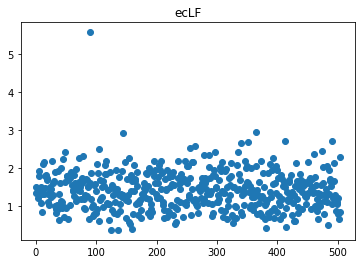

In [12]:
ys = eclf.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('ecLF')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

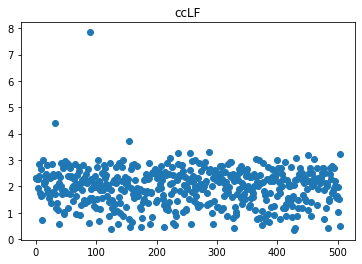

In [13]:
ys = cclf.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('ccLF')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

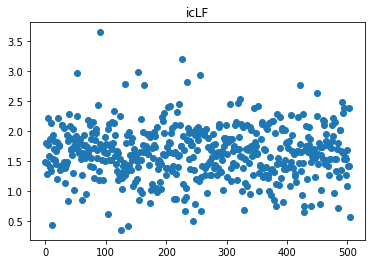

In [14]:
ys = iclf.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('icLF')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

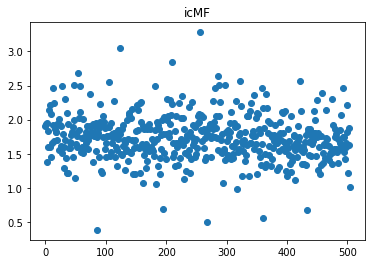

In [15]:
ys = icmf.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('icMF')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

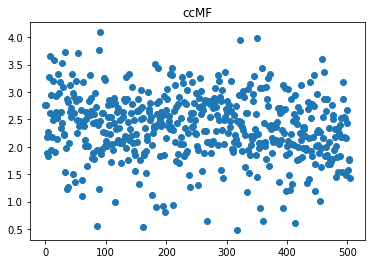

In [16]:
ys = ccmf.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('ccMF')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

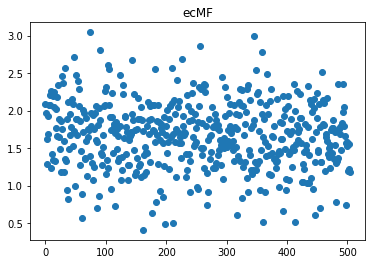

In [17]:
ys = ecmf.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('ecMF')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

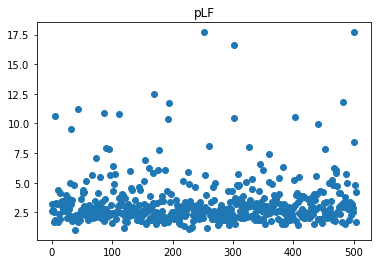

In [18]:
ys = plf.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('pLF')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

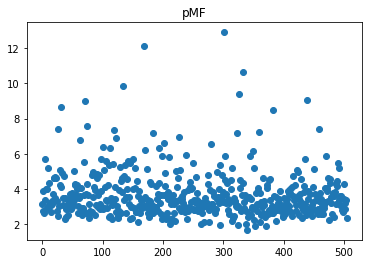

In [19]:
ys = pmf.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('pMF')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

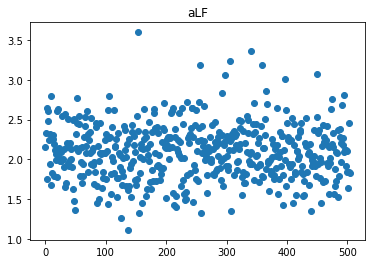

In [20]:
ys = alf.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('aLF')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

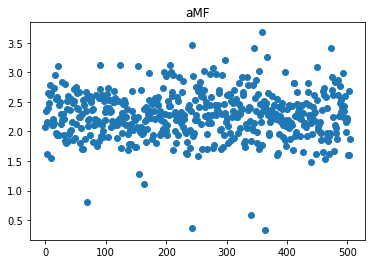

In [21]:
ys = amf.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('aMF')
for i in range(len(xs)):
    pass

### Tibia

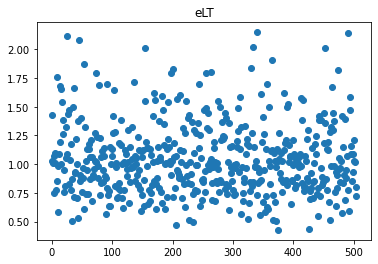

In [22]:
ys = elt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('eLT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

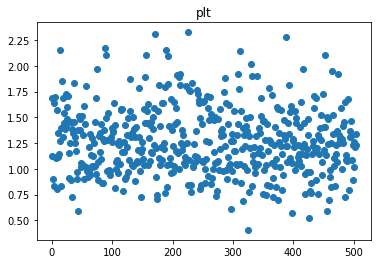

In [23]:
ys = plt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('plt')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

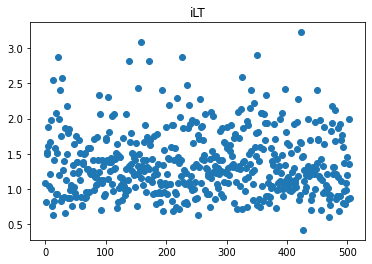

In [24]:
ys = ilt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('iLT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

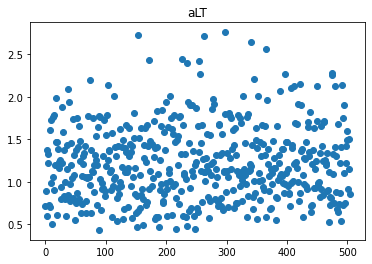

In [25]:
ys = alt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('aLT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

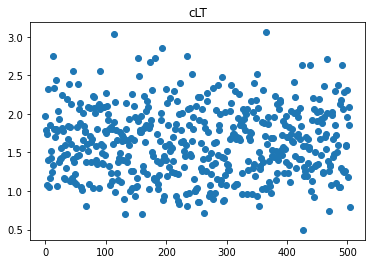

In [26]:
ys = clt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('cLT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

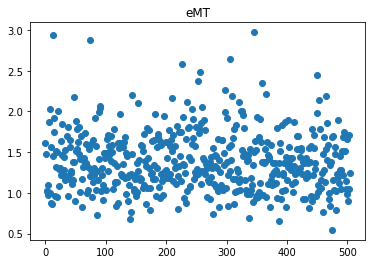

In [27]:
ys = emt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('eMT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

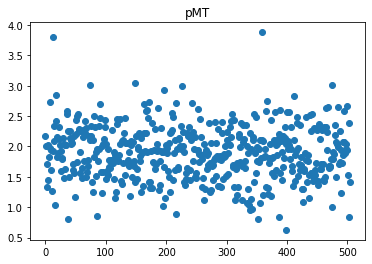

In [28]:
ys = pmt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('pMT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

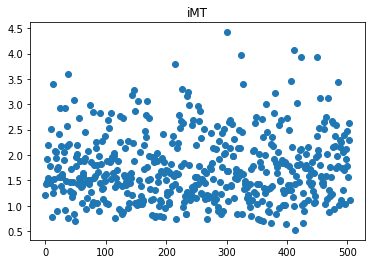

In [29]:
ys = imt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('iMT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

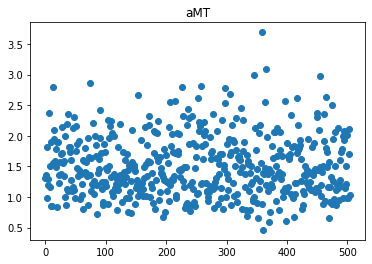

In [30]:
ys = amt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('aMT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

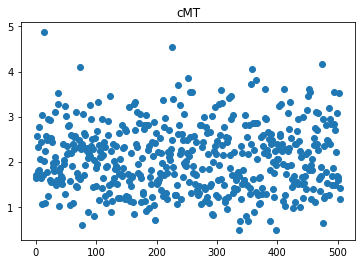

In [31]:
ys = cmt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('cMT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

## Subregion boxplots

### Femur

Segmentation 9145695.0 is an outlier (4.20 total deviation from median)
Segmentation 9750090.0 is an outlier (1.54 total deviation from median)
Segmentation 9388068.0 is an outlier (1.57 total deviation from median)
Segmentation 9102858.0 is an outlier (1.32 total deviation from median)
Segmentation 9130672.0 is an outlier (1.33 total deviation from median)


Text(0.5, 1.0, 'ecLF')

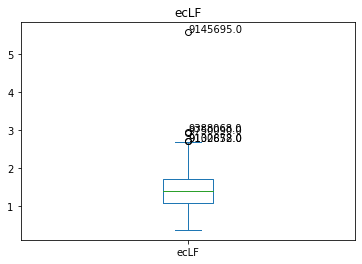

In [32]:
ys = eclf.to_numpy()
eclf.plot.box()
#pylt.boxplot(ys)
q1 = eclf.quantile(.25)
q3 = eclf.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - eclf.median()):.2f} total deviation from median)')
        
pylt.title('ecLF')

Segmentation 9146462.0 is an outlier (2.35 total deviation from median)
Segmentation 9145695.0 is an outlier (5.81 total deviation from median)


Text(0.5, 1.0, 'ccLF')

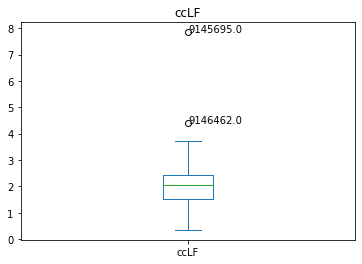

In [33]:
ys = cclf.to_numpy()
cclf.plot.box()
#pylt.boxplot(ys)
q1 = cclf.quantile(.25)
q3 = cclf.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - cclf.median()):.2f} total deviation from median)')
        
pylt.title('ccLF')

Segmentation 9215922.0 is an outlier (1.21 total deviation from median)
Segmentation 9208400.0 is an outlier (1.32 total deviation from median)
Segmentation 9145695.0 is an outlier (2.00 total deviation from median)
Segmentation 9988421.0 is an outlier (1.03 total deviation from median)
Segmentation 9943227.0 is an outlier (1.30 total deviation from median)
Segmentation 9908089.0 is an outlier (1.14 total deviation from median)
Segmentation 9745458.0 is an outlier (1.24 total deviation from median)
Segmentation 9606490.0 is an outlier (1.33 total deviation from median)
Segmentation 9624170.0 is an outlier (1.12 total deviation from median)
Segmentation 9518267.0 is an outlier (1.55 total deviation from median)
Segmentation 9468561.0 is an outlier (1.16 total deviation from median)
Segmentation 9441432.0 is an outlier (1.15 total deviation from median)
Segmentation 9410941.0 is an outlier (1.28 total deviation from median)
Segmentation 9049223.0 is an outlier (1.12 total deviation from 

Text(0.5, 1.0, 'icLF')

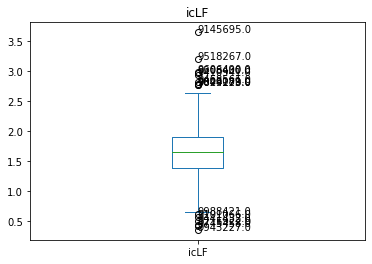

In [34]:
ys = iclf.to_numpy()
iclf.plot.box()
#pylt.boxplot(ys)
q1 = iclf.quantile(.25)
q3 = iclf.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - iclf.median()):.2f} total deviation from median)')
        
pylt.title('icLF')

Segmentation 9223980.0 is an outlier (0.76 total deviation from median)
Segmentation 9222973.0 is an outlier (0.78 total deviation from median)
Segmentation 9180558.0 is an outlier (0.96 total deviation from median)
Segmentation 9212052.0 is an outlier (0.76 total deviation from median)
Segmentation 9223590.0 is an outlier (1.34 total deviation from median)
Segmentation 9899098.0 is an outlier (0.82 total deviation from median)
Segmentation 9614934.0 is an outlier (1.33 total deviation from median)
Segmentation 9766939.0 is an outlier (0.77 total deviation from median)
Segmentation 9672573.0 is an outlier (1.03 total deviation from median)
Segmentation 9481413.0 is an outlier (1.12 total deviation from median)
Segmentation 9410941.0 is an outlier (1.56 total deviation from median)
Segmentation 9517311.0 is an outlier (1.23 total deviation from median)
Segmentation 9460377.0 is an outlier (0.92 total deviation from median)
Segmentation 9469318.0 is an outlier (0.78 total deviation from 

Text(0.5, 1.0, 'icMF')

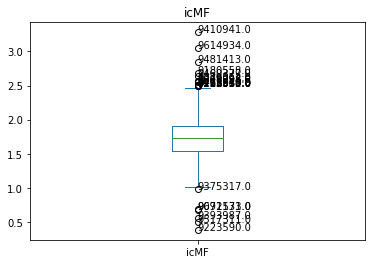

In [35]:
ys = icmf.to_numpy()
icmf.plot.box()
#pylt.boxplot(ys)
q1 = icmf.quantile(.25)
q3 = icmf.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - icmf.median()):.2f} total deviation from median)')
        
pylt.title('icMF')

Segmentation 9223590.0 is an outlier (1.83 total deviation from median)
Segmentation 9241424.0 is an outlier (1.71 total deviation from median)
Segmentation 9781749.0 is an outlier (1.84 total deviation from median)
Segmentation 9631713.0 is an outlier (1.49 total deviation from median)
Segmentation 9691663.0 is an outlier (1.57 total deviation from median)
Segmentation 9517311.0 is an outlier (1.74 total deviation from median)
Segmentation 9375317.0 is an outlier (1.90 total deviation from median)
Segmentation 9329062.0 is an outlier (1.56 total deviation from median)
Segmentation 9332345.0 is an outlier (1.62 total deviation from median)
Segmentation 9371267.0 is an outlier (1.50 total deviation from median)
Segmentation 9393987.0 is an outlier (1.74 total deviation from median)
Segmentation 9344856.0 is an outlier (1.49 total deviation from median)
Segmentation 9048192.0 is an outlier (1.77 total deviation from median)


Text(0.5, 1.0, 'ccMF')

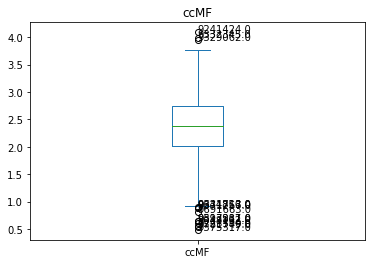

In [36]:
ys = ccmf.to_numpy()
ccmf.plot.box()
#pylt.boxplot(ys)
q1 = ccmf.quantile(.25)
q3 = ccmf.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - ccmf.median()):.2f} total deviation from median)')
        
pylt.title('ccMF')

Segmentation 9249025.0 is an outlier (1.36 total deviation from median)
Segmentation 9781749.0 is an outlier (1.28 total deviation from median)
Segmentation 9691663.0 is an outlier (1.21 total deviation from median)
Segmentation 9410941.0 is an outlier (1.17 total deviation from median)
Segmentation 9311328.0 is an outlier (1.31 total deviation from median)


Text(0.5, 1.0, 'ecMF')

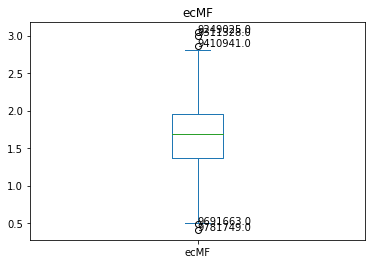

In [37]:
ys = ecmf.to_numpy()
ecmf.plot.box()
#pylt.boxplot(ys)
q1 = ecmf.quantile(.25)
q3 = ecmf.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - ecmf.median()):.2f} total deviation from median)')
        
pylt.title('ecMF')

Segmentation 9264694.0 is an outlier (7.92 total deviation from median)
Segmentation 9146462.0 is an outlier (6.83 total deviation from median)
Segmentation 9258563.0 is an outlier (8.47 total deviation from median)
Segmentation 9162394.0 is an outlier (2.91 total deviation from median)
Segmentation 9191054.0 is an outlier (4.35 total deviation from median)
Segmentation 9242457.0 is an outlier (8.19 total deviation from median)
Segmentation 9145695.0 is an outlier (5.17 total deviation from median)
Segmentation 9207016.0 is an outlier (5.11 total deviation from median)
Segmentation 9221040.0 is an outlier (2.88 total deviation from median)
Segmentation 9993650.0 is an outlier (3.69 total deviation from median)
Segmentation 9899098.0 is an outlier (2.99 total deviation from median)
Segmentation 9867315.0 is an outlier (8.07 total deviation from median)
Segmentation 9689922.0 is an outlier (3.29 total deviation from median)
Segmentation 9606490.0 is an outlier (4.20 total deviation from 

Text(0.5, 1.0, 'pLF')

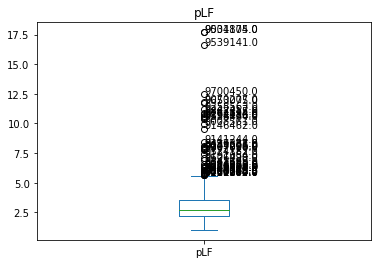

In [38]:
ys = plf.to_numpy()
plf.plot.box()
#pylt.boxplot(ys)
q1 = plf.quantile(.25)
q3 = plf.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - plf.median()):.2f} total deviation from median)')
        
pylt.title('pLF')

Segmentation 9223980.0 is an outlier (4.06 total deviation from median)
Segmentation 9146462.0 is an outlier (5.35 total deviation from median)
Segmentation 9181790.0 is an outlier (3.46 total deviation from median)
Segmentation 9247140.0 is an outlier (5.69 total deviation from median)
Segmentation 9256759.0 is an outlier (4.25 total deviation from median)
Segmentation 9993650.0 is an outlier (3.07 total deviation from median)
Segmentation 9545822.0 is an outlier (3.01 total deviation from median)
Segmentation 9793168.0 is an outlier (3.99 total deviation from median)
Segmentation 9614934.0 is an outlier (3.57 total deviation from median)
Segmentation 9995338.0 is an outlier (6.54 total deviation from median)
Segmentation 9700450.0 is an outlier (8.81 total deviation from median)
Segmentation 9686590.0 is an outlier (2.87 total deviation from median)
Segmentation 9951449.0 is an outlier (3.84 total deviation from median)
Segmentation 9556464.0 is an outlier (2.97 total deviation from 

Text(0.5, 1.0, 'pMF')

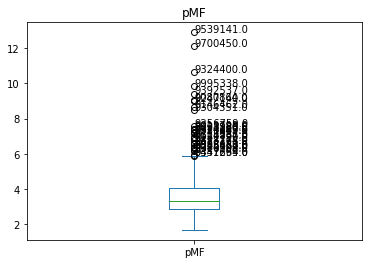

In [39]:
ys = pmf.to_numpy()
pmf.plot.box()
#pylt.boxplot(ys)
q1 = pmf.quantile(.25)
q3 = pmf.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - pmf.median()):.2f} total deviation from median)')
        
pylt.title('pMF')

Segmentation 9745458.0 is an outlier (0.98 total deviation from median)
Segmentation 9606490.0 is an outlier (1.50 total deviation from median)
Segmentation 9410941.0 is an outlier (1.10 total deviation from median)
Segmentation 9493245.0 is an outlier (0.96 total deviation from median)
Segmentation 9302260.0 is an outlier (1.15 total deviation from median)
Segmentation 9395979.0 is an outlier (1.27 total deviation from median)
Segmentation 9291078.0 is an outlier (1.09 total deviation from median)
Segmentation 9323079.0 is an outlier (0.92 total deviation from median)
Segmentation 9108714.0 is an outlier (0.98 total deviation from median)


Text(0.5, 1.0, 'aLF')

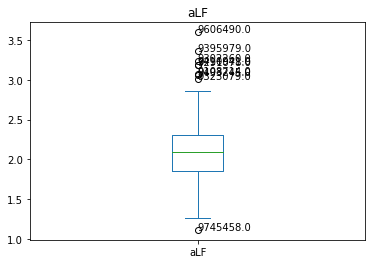

In [40]:
ys = alf.to_numpy()
alf.plot.box()
#pylt.boxplot(ys)
q1 = alf.quantile(.25)
q3 = alf.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - alf.median()):.2f} total deviation from median)')
        
pylt.title('aLF')

Segmentation 9214395.0 is an outlier (1.45 total deviation from median)
Segmentation 9878871.0 is an outlier (1.15 total deviation from median)
Segmentation 9474901.0 is an outlier (1.89 total deviation from median)
Segmentation 9409032.0 is an outlier (1.20 total deviation from median)
Segmentation 9395979.0 is an outlier (1.67 total deviation from median)
Segmentation 9311328.0 is an outlier (1.15 total deviation from median)
Segmentation 9291078.0 is an outlier (1.42 total deviation from median)
Segmentation 9287216.0 is an outlier (1.93 total deviation from median)
Segmentation 9055836.0 is an outlier (1.15 total deviation from median)


Text(0.5, 1.0, 'aMF')

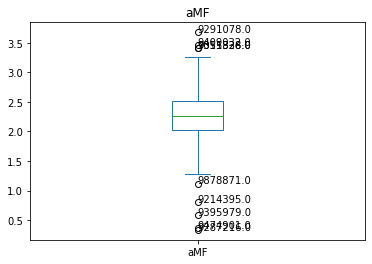

In [41]:
ys = amf.to_numpy()
amf.plot.box()
#pylt.boxplot(ys)
q1 = amf.quantile(.25)
q3 = amf.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - amf.median()):.2f} total deviation from median)')
        
pylt.title('aMF')

### Tibia

Segmentation 9186589.0 is an outlier (0.75 total deviation from median)
Segmentation 9218935.0 is an outlier (1.11 total deviation from median)
Segmentation 9223789.0 is an outlier (1.07 total deviation from median)
Segmentation 9180558.0 is an outlier (0.86 total deviation from median)
Segmentation 9249025.0 is an outlier (0.78 total deviation from median)
Segmentation 9606490.0 is an outlier (1.01 total deviation from median)
Segmentation 9691663.0 is an outlier (0.78 total deviation from median)
Segmentation 9566781.0 is an outlier (0.82 total deviation from median)
Segmentation 9471287.0 is an outlier (0.79 total deviation from median)
Segmentation 9494867.0 is an outlier (0.80 total deviation from median)
Segmentation 9376280.0 is an outlier (0.83 total deviation from median)
Segmentation 9397988.0 is an outlier (1.01 total deviation from median)
Segmentation 9395979.0 is an outlier (1.14 total deviation from median)
Segmentation 9388068.0 is an outlier (0.89 total deviation from 

Text(0.5, 1.0, 'eLT')

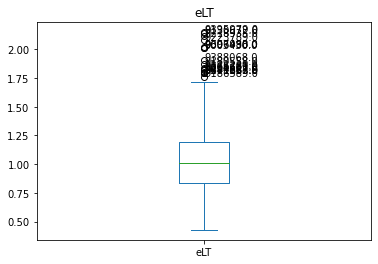

In [42]:
ys = elt.to_numpy()
elt.plot.box()
#pylt.boxplot(ys)
q1 = elt.quantile(.25)
q3 = elt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - elt.median()):.2f} total deviation from median)')
        
pylt.title('eLT')

Segmentation 9154793.0 is an outlier (0.91 total deviation from median)
Segmentation 9258562.0 is an outlier (0.93 total deviation from median)
Segmentation 9152295.0 is an outlier (0.86 total deviation from median)
Segmentation 9700341.0 is an outlier (0.86 total deviation from median)
Segmentation 9686590.0 is an outlier (1.07 total deviation from median)
Segmentation 9933836.0 is an outlier (0.91 total deviation from median)
Segmentation 9556464.0 is an outlier (0.85 total deviation from median)
Segmentation 9518267.0 is an outlier (1.08 total deviation from median)
Segmentation 9326707.0 is an outlier (0.90 total deviation from median)
Segmentation 9340139.0 is an outlier (0.84 total deviation from median)
Segmentation 9314341.0 is an outlier (1.04 total deviation from median)
Segmentation 9003430.0 is an outlier (0.86 total deviation from median)


Text(0.5, 1.0, 'pLT')

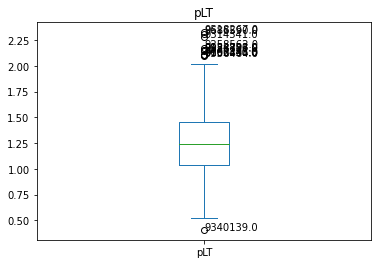

In [43]:
ys = plt.to_numpy()
plt.plot.box()
#pylt.boxplot(ys)
q1 = plt.quantile(.25)
q3 = plt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - plt.median()):.2f} total deviation from median)')
        
pylt.title('pLT')

Segmentation 9154793.0 is an outlier (1.27 total deviation from median)
Segmentation 9250129.0 is an outlier (1.59 total deviation from median)
Segmentation 9223980.0 is an outlier (1.29 total deviation from median)
Segmentation 9732959.0 is an outlier (1.53 total deviation from median)
Segmentation 9987407.0 is an outlier (1.80 total deviation from median)
Segmentation 9686590.0 is an outlier (1.53 total deviation from median)
Segmentation 9518267.0 is an outlier (1.59 total deviation from median)
Segmentation 9392537.0 is an outlier (1.31 total deviation from median)
Segmentation 9332345.0 is an outlier (1.61 total deviation from median)
Segmentation 9052956.0 is an outlier (1.94 total deviation from median)


Text(0.5, 1.0, 'iLT')

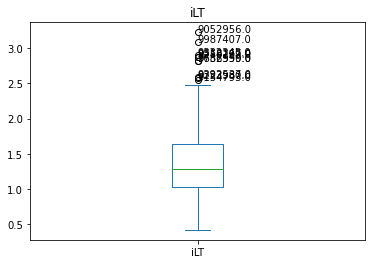

In [44]:
ys = ilt.to_numpy()
ilt.plot.box()
#pylt.boxplot(ys)
q1 = ilt.quantile(.25)
q3 = ilt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - ilt.median()):.2f} total deviation from median)')
        
pylt.title('iLT')

Segmentation 9606490.0 is an outlier (1.56 total deviation from median)
Segmentation 9686590.0 is an outlier (1.26 total deviation from median)
Segmentation 9518267.0 is an outlier (1.28 total deviation from median)
Segmentation 9468561.0 is an outlier (1.23 total deviation from median)
Segmentation 9471287.0 is an outlier (1.26 total deviation from median)
Segmentation 9494867.0 is an outlier (1.54 total deviation from median)
Segmentation 9493245.0 is an outlier (1.59 total deviation from median)
Segmentation 9395979.0 is an outlier (1.48 total deviation from median)
Segmentation 9388068.0 is an outlier (1.40 total deviation from median)


Text(0.5, 1.0, 'aLT')

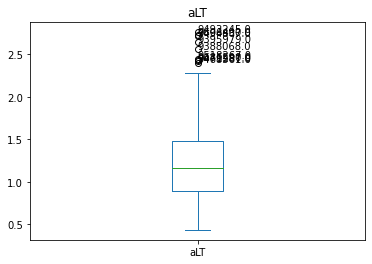

In [45]:
ys = alt.to_numpy()
alt.plot.box()
#pylt.boxplot(ys)
q1 = alt.quantile(.25)
q3 = alt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - alt.median()):.2f} total deviation from median)')
        
pylt.title('aLT')

Segmentation 9817241.0 is an outlier (1.40 total deviation from median)
Segmentation 9388068.0 is an outlier (1.43 total deviation from median)


Text(0.5, 1.0, 'cLT')

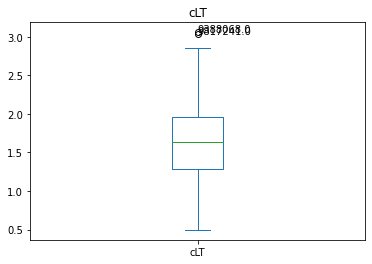

In [46]:
ys = clt.to_numpy()
clt.plot.box()
#pylt.boxplot(ys)
q1 = clt.quantile(.25)
q3 = clt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - clt.median()):.2f} total deviation from median)')
        
pylt.title('cLT')

Segmentation 9154793.0 is an outlier (1.59 total deviation from median)
Segmentation 9249025.0 is an outlier (1.54 total deviation from median)
Segmentation 9518267.0 is an outlier (1.24 total deviation from median)
Segmentation 9534875.0 is an outlier (1.03 total deviation from median)
Segmentation 9410941.0 is an outlier (1.14 total deviation from median)
Segmentation 9302260.0 is an outlier (1.31 total deviation from median)
Segmentation 9311328.0 is an outlier (1.63 total deviation from median)
Segmentation 9291078.0 is an outlier (1.00 total deviation from median)
Segmentation 9108714.0 is an outlier (1.10 total deviation from median)


Text(0.5, 1.0, 'eMT')

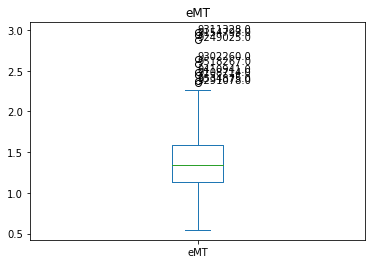

In [47]:
ys = emt.to_numpy()
emt.plot.box()
#pylt.boxplot(ys)
q1 = emt.quantile(.25)
q3 = emt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - emt.median()):.2f} total deviation from median)')
        
pylt.title('eMT')

Segmentation 9154793.0 is an outlier (1.91 total deviation from median)
Segmentation 9249025.0 is an outlier (1.12 total deviation from median)
Segmentation 9862541.0 is an outlier (1.14 total deviation from median)
Segmentation 9291078.0 is an outlier (1.98 total deviation from median)
Segmentation 9319367.0 is an outlier (1.27 total deviation from median)
Segmentation 9094693.0 is an outlier (1.11 total deviation from median)


Text(0.5, 1.0, 'pMT')

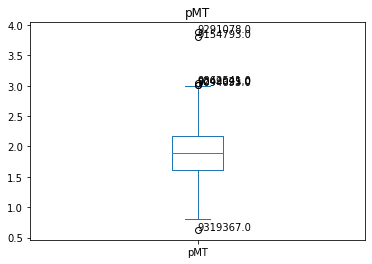

In [48]:
ys = pmt.to_numpy()
pmt.plot.box()
#pylt.boxplot(ys)
q1 = pmt.quantile(.25)
q3 = pmt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - pmt.median()):.2f} total deviation from median)')
        
pylt.title('pMT')

Segmentation 9211869.0 is an outlier (1.98 total deviation from median)
Segmentation 9458093.0 is an outlier (2.18 total deviation from median)
Segmentation 9539141.0 is an outlier (2.80 total deviation from median)
Segmentation 9369286.0 is an outlier (2.36 total deviation from median)
Segmentation 9122643.0 is an outlier (1.84 total deviation from median)
Segmentation 9035647.0 is an outlier (2.45 total deviation from median)
Segmentation 9052956.0 is an outlier (2.32 total deviation from median)
Segmentation 9024940.0 is an outlier (2.31 total deviation from median)
Segmentation 9027422.0 is an outlier (1.83 total deviation from median)


Text(0.5, 1.0, 'iMT')

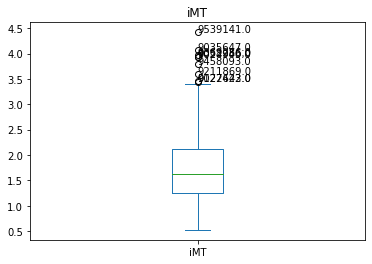

In [49]:
ys = imt.to_numpy()
imt.plot.box()
#pylt.boxplot(ys)
q1 = imt.quantile(.25)
q3 = imt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - imt.median()):.2f} total deviation from median)')
        
pylt.title('iMT')

Segmentation 9249025.0 is an outlier (1.45 total deviation from median)
Segmentation 9311328.0 is an outlier (1.58 total deviation from median)
Segmentation 9291078.0 is an outlier (2.28 total deviation from median)
Segmentation 9388068.0 is an outlier (1.67 total deviation from median)
Segmentation 9066770.0 is an outlier (1.56 total deviation from median)


Text(0.5, 1.0, 'aMT')

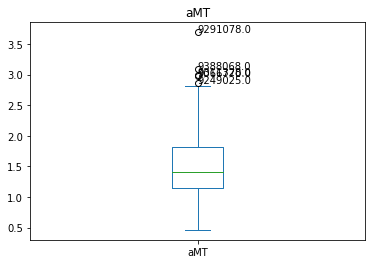

In [50]:
ys = amt.to_numpy()
amt.plot.box()
#pylt.boxplot(ys)
q1 = amt.quantile(.25)
q3 = amt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - amt.median()):.2f} total deviation from median)')
        
pylt.title('aMT')

Segmentation 9154793.0 is an outlier (2.83 total deviation from median)
Segmentation 9249025.0 is an outlier (2.06 total deviation from median)
Segmentation 9518267.0 is an outlier (2.51 total deviation from median)
Segmentation 9094693.0 is an outlier (2.12 total deviation from median)


Text(0.5, 1.0, 'cMT')

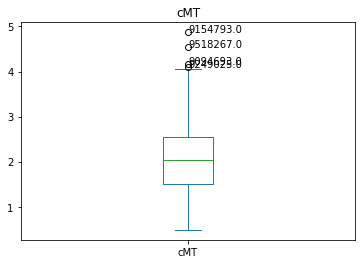

In [51]:
ys = cmt.to_numpy()
cmt.plot.box()
#pylt.boxplot(ys)
q1 = cmt.quantile(.25)
q3 = cmt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - cmt.median()):.2f} total deviation from median)')
        
pylt.title('cMT')

<AxesSubplot:>

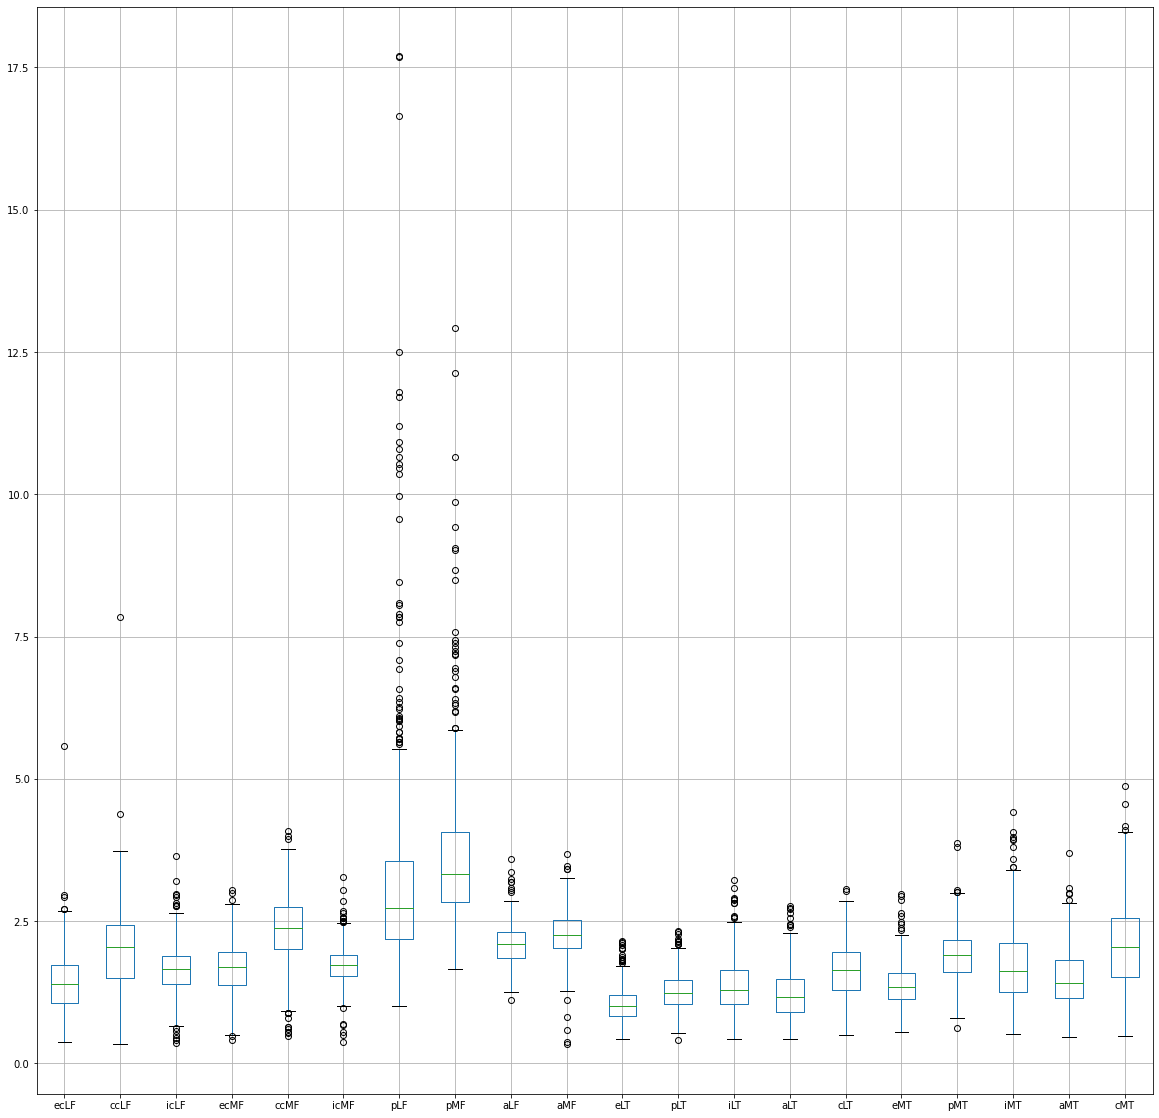

In [52]:
df.boxplot(column=['ecLF', 'ccLF', 'icLF', 'ecMF', 'ccMF', 'icMF', 'pLF', 'pMF',
       'aLF', 'aMF', 'eLT', 'pLT', 'iLT', 'aLT', 'cLT', 'eMT', 'pMT', 'iMT', 'aMT',
       'cMT'], figsize=(20,20))